In [57]:
# !pip uninstall -y tensorflow

In [58]:
#  !pip install tensorflow==2.8.0
# import tensorflow as tf
# print(tf.__version__)

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization, MaxPooling2D
from keras.layers import Input, Conv2D, MaxPool2D, Convolution2D
# Đọc tệp tin .npy
X = np.load('/kaggle/input/cnndataset/X_train.npy')
Y = np.load('/kaggle/input/cnndataset/y_train.npy')
x_train = X#[:35000]
# x_test = X#[35000:]
y_train = Y#[:35000]
# y_test = Y#[35000:]
# x_train = x_train/255.0
# y_train = y_train/255.0

print("x_train shape:", x_train.shape)
print("x_train shape:", y_train.shape)

x_train shape: (42000, 784)
x_train shape: (42000,)


x_train shape: (37800, 28, 28, 1)
x_train shape: (37800, 10)


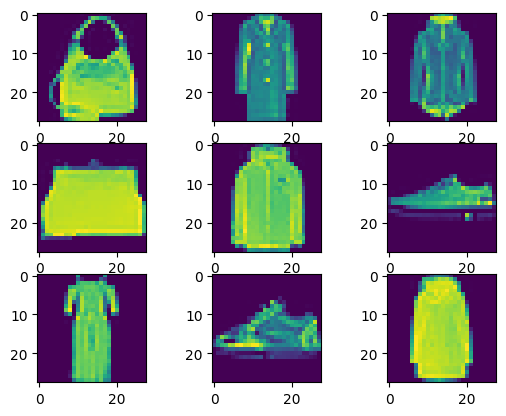

In [60]:
# Resize and normalize the images
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# x_train = x_train.reshape((x_train.shape[0], 28, 28))
# x_train = np.expand_dims(x_train, axis = 3)
# x_test = x_test.reshape((x_test.shape[0], 28, 28))
# x_test = np.expand_dims(x_test, axis = 3)
# Convert labels to categorical one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# # Split the data into training and validation sets

random_seed = 2
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

print("x_train shape:", x_train.shape)
print("x_train shape:", y_train.shape)
from matplotlib import pyplot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [61]:
# Định nghĩa số class và định dạng đầu vào cho mô hình
num_classes = 10
# input_shape = (28, 28, 1)
# định nghĩa hàm loss
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# định nghĩa thuật toán tối ưu
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# # Learning rate schedule
def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

##############################################################################################

# x_train = X[:35000]
# x_test = X[35000:]
# y_train = Y[:35000]
# y_test = Y[35000:]
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

##############################################################################################
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.01, momentum=0.9)
cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# compile model
# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##############################################################################################
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

##############################################################################################

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau


# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
# #         featurewise_center=False,  # set input mean to 0 over the dataset
# #         samplewise_center=False,  # set each sample mean to 0
# #         featurewise_std_normalization=False,  # divide inputs by std of the dataset
# #         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=True,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
# #         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
# #         horizontal_flip=False,  # randomly flip images
#         vertical_flip=True)  # randomly flip images

# datagen.fit(x_train)

# Learning rate schedule
# def lr_schedule(epoch):
#     return 0.001 * 0.9 ** epoch

########################################################################################

# optimizer = Adam(learning_rate=0.0001)#RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)

lrr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-3, mode='min')

def model_advanced(classes=10,optimizer='adam'):
    kernel_size = (3,3)
    dropout = 0.25
    pool_size = (2,2)
    inputs = Input(shape=(28,28,1))
    y = Conv2D(filters=32, kernel_size=kernel_size,activation='relu',padding='same',strides=(1,1))(inputs)
    y = BatchNormalization()(y)
    y = Conv2D(filters=64, kernel_size=kernel_size,activation='relu',padding='same',strides=(1,1))(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D(pool_size=pool_size,strides=(2,2))(y)
    y = Dropout(dropout)(y) 

    y = Conv2D(filters=64,kernel_size=kernel_size,activation='relu',padding='same',strides=(1,1))(y)
    y = BatchNormalization()(y)
    y = Conv2D(filters=64,kernel_size=kernel_size,activation='relu',padding='same',strides=(1,1))(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D(pool_size=pool_size,strides=(2,2))(y)
    y = Dropout(dropout)(y)

    y = Flatten()(y)


    y = Dense(100,activation='relu')(y)
    y = BatchNormalization()(y)
    y = Dense(100,activation='relu')(y)
    y = BatchNormalization()(y)
    y = Dropout(dropout)(y)
    outputs = Dense(classes, activation='softmax')(y)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = model_advanced()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_65 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_66 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0   

In [63]:
weights_filepath = './weights/'
# Tạo một callbback để lưu mô hình theo một cách mong muốn
callback = tf.keras.callbacks.ModelCheckpoint(filepath = weights_filepath, monitor='val_loss', verbose=1,
save_best_only=True)


batch_size = 52
epochs = 20
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=[lrr,callback])

Epoch 1/20
721/727 [============================>.] - ETA: 0s - loss: 0.4852 - accuracy: 0.8302
Epoch 1: val_loss improved from inf to 0.30173, saving model to ./weights/
727/727 [==============================] - 11s 13ms/step - loss: 0.4839 - accuracy: 0.8305 - val_loss: 0.3017 - val_accuracy: 0.8948 - lr: 0.0010
Epoch 2/20
722/727 [============================>.] - ETA: 0s - loss: 0.3078 - accuracy: 0.8901
Epoch 2: val_loss improved from 0.30173 to 0.28322, saving model to ./weights/
727/727 [==============================] - 9s 12ms/step - loss: 0.3083 - accuracy: 0.8900 - val_loss: 0.2832 - val_accuracy: 0.8981 - lr: 0.0010
Epoch 3/20
721/727 [============================>.] - ETA: 0s - loss: 0.2635 - accuracy: 0.9046
Epoch 3: val_loss improved from 0.28322 to 0.23322, saving model to ./weights/
727/727 [==============================] - 9s 13ms/step - loss: 0.2635 - accuracy: 0.9045 - val_loss: 0.2332 - val_accuracy: 0.9126 - lr: 0.0010
Epoch 4/20
723/727 [=======================

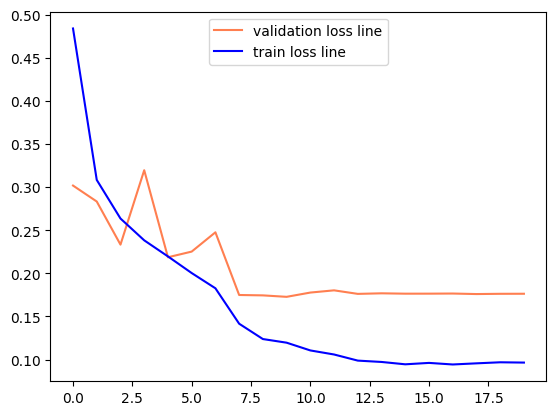

In [64]:
import matplotlib.pyplot as plt
# vẽ đường loss trên tập train và tập validation
plt.plot(history.history['val_loss'], c = 'coral', label = 'validation loss line')
plt.plot(history.history['loss'], c = 'blue', label = 'train loss line')
legend = plt.legend(loc='upper center')
plt.show()

In [66]:
# !zip -r weight0172.zip /kaggle/working/weights

  adding: kaggle/working/weights/ (stored 0%)
  adding: kaggle/working/weights/assets/ (stored 0%)
  adding: kaggle/working/weights/variables/ (stored 0%)
  adding: kaggle/working/weights/variables/variables.index (deflated 74%)
  adding: kaggle/working/weights/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: kaggle/working/weights/saved_model.pb (deflated 89%)
  adding: kaggle/working/weights/keras_metadata.pb (deflated 93%)
